### Importación de datos



In [6]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [7]:
# Convertir la columna 'Fecha de Compra' a datetime
tienda1['Fecha de Compra'] = pd.to_datetime(tienda1['Fecha de Compra'], format='%d/%m/%Y', errors='coerce')
tienda2['Fecha de Compra'] = pd.to_datetime(tienda2['Fecha de Compra'], format='%d/%m/%Y', errors='coerce')
tienda3['Fecha de Compra'] = pd.to_datetime(tienda3['Fecha de Compra'], format='%d/%m/%Y', errors='coerce')
tienda4['Fecha de Compra'] = pd.to_datetime(tienda4['Fecha de Compra'], format='%d/%m/%Y', errors='coerce')
tienda4['Fecha de Compra'] = pd.to_datetime(tienda4['Fecha de Compra'], format='%d/%m/%Y', errors='coerce')

In [9]:
total_precio_tienda1 = tienda1['Precio'].sum()
total_precio_tienda2 = tienda2['Precio'].sum()
total_precio_tienda3 = tienda3['Precio'].sum()
total_precio_tienda4 = tienda4['Precio'].sum()

print(f"Total ingresos tienda 1: {total_precio_tienda1:,}")
print(f"Total ingresos tienda 2: {total_precio_tienda2:,}")
print(f"Total ingresos tienda 3: {total_precio_tienda3:,}")
print(f"Total ingresos tienda 4: {total_precio_tienda4:,}")

Total ingresos tienda 1: 1,150,880,400.0
Total ingresos tienda 2: 1,116,343,500.0
Total ingresos tienda 3: 1,098,019,600.0
Total ingresos tienda 4: 1,038,375,700.0


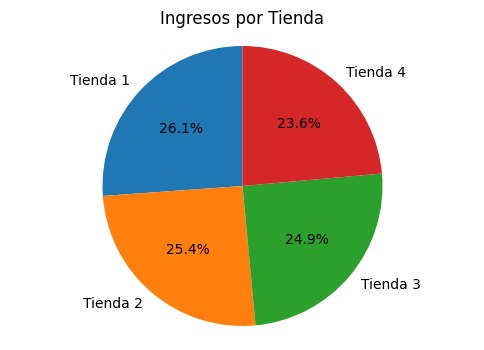

In [10]:

import matplotlib.pyplot as plt

# Datos de ingresos de cada tienda
ingresos = {
    'Tienda 1': total_precio_tienda1,
    'Tienda 2': total_precio_tienda2,
    'Tienda 3': total_precio_tienda3,
    'Tienda 4': total_precio_tienda4
}

nombres_tiendas = list(ingresos.keys())
valores_ingresos = list(ingresos.values())

# Crear la gráfica de torta
plt.figure(figsize=(6, 4))  # Ajustar el tamaño de la figura
plt.pie(valores_ingresos, labels=nombres_tiendas, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Para que el círculo se vea como un círculo
plt.title('Ingresos por Tienda')
plt.show()

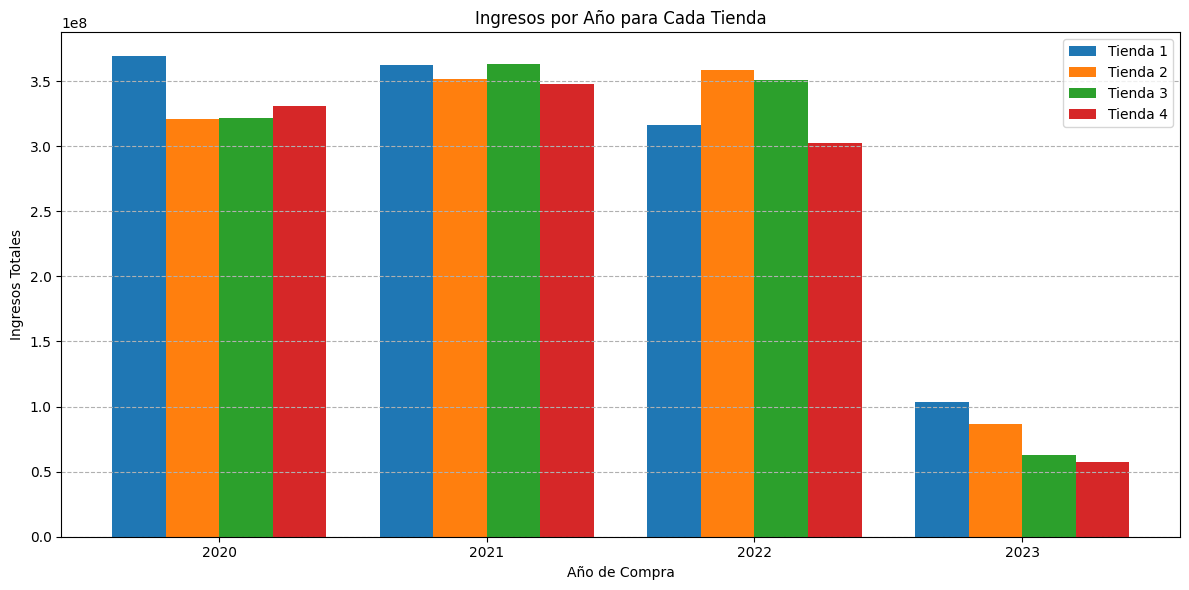

In [11]:

# Crea una función para procesar cada tienda
def procesar_tienda(tienda, nombre_tienda):
  # Extraer el año de la fecha de compra
  tienda['Año de Compra'] = tienda['Fecha de Compra'].dt.year

  # Agrupar por año y sumar los ingresos
  ingresos_por_año = tienda.groupby('Año de Compra')['Precio'].sum()

  return ingresos_por_año

# Procesar cada tienda
ingresos_tienda1 = procesar_tienda(tienda1, 'Tienda 1')
ingresos_tienda2 = procesar_tienda(tienda2, 'Tienda 2')
ingresos_tienda3 = procesar_tienda(tienda3, 'Tienda 3')
ingresos_tienda4 = procesar_tienda(tienda4, 'Tienda 4')

# Crear la gráfica
plt.figure(figsize=(12, 6))

# Graficar cada tienda
plt.bar(ingresos_tienda1.index - 0.3, ingresos_tienda1.values, width=0.2, label='Tienda 1')
plt.bar(ingresos_tienda2.index - 0.1, ingresos_tienda2.values, width=0.2, label='Tienda 2')
plt.bar(ingresos_tienda3.index + 0.1, ingresos_tienda3.values, width=0.2, label='Tienda 3')
plt.bar(ingresos_tienda4.index + 0.3, ingresos_tienda4.values, width=0.2, label='Tienda 4')

plt.xlabel('Año de Compra')
plt.ylabel('Ingresos Totales')
plt.title('Ingresos por Año para Cada Tienda')
plt.xticks(ingresos_tienda1.index) # Asegurar que los años se muestren correctamente
plt.legend()
plt.grid(True, axis='y', linestyle='--')
plt.tight_layout()  # Evita que las etiquetas se superpongan
plt.show()

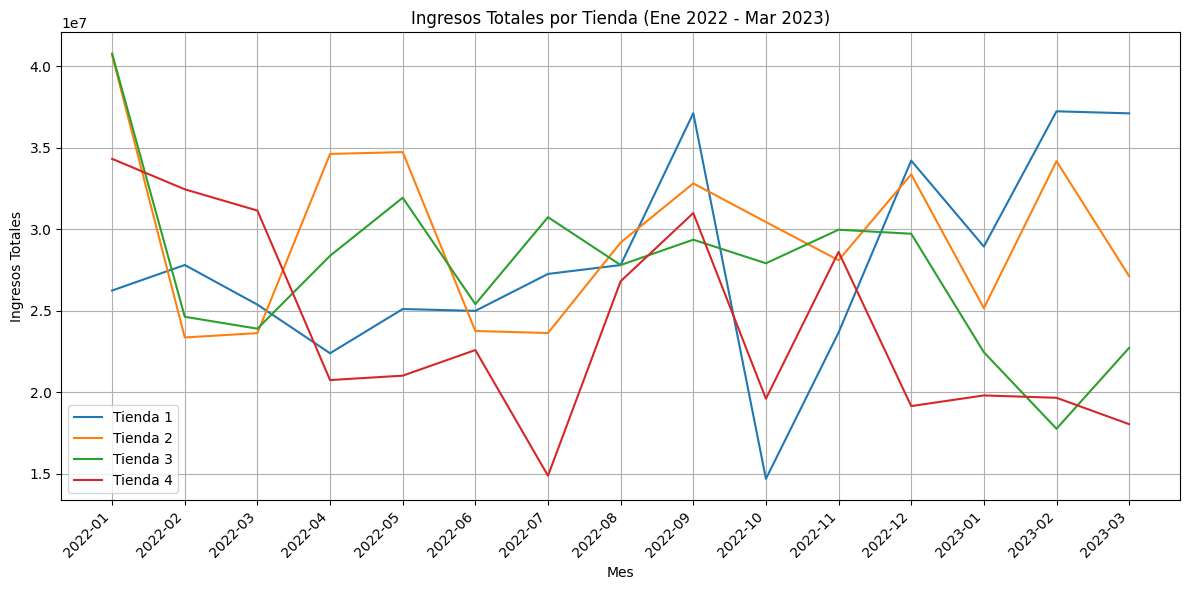

In [12]:
tiendas = [tienda1, tienda2, tienda3, tienda4]
datos_combinados = pd.concat(tiendas, keys=['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], names=['Tienda', 'Indice'])

# Filtrar datos para el período (enero 2022 a marzo 2023)
fecha_inicio = pd.to_datetime('2022-01-01')
fecha_fin = pd.to_datetime('2023-03-31')

datos_filtrados = datos_combinados[(datos_combinados['Fecha de Compra'] >= fecha_inicio) & (datos_combinados['Fecha de Compra'] <= fecha_fin)]


# Agrupar datos por tienda y mes, luego sumar ingresos
ingresos_mensuales_por_tienda = datos_filtrados.groupby(['Tienda', datos_filtrados['Fecha de Compra'].dt.to_period('M')])['Precio'].sum().reset_index()


# Crear el gráfico
plt.figure(figsize=(12, 6))

for tienda in ingresos_mensuales_por_tienda['Tienda'].unique():
    datos_tienda = ingresos_mensuales_por_tienda[ingresos_mensuales_por_tienda['Tienda'] == tienda]
    plt.plot(datos_tienda['Fecha de Compra'].astype(str), datos_tienda['Precio'], label=tienda)

plt.xlabel('Mes')
plt.ylabel('Ingresos Totales')
plt.title('Ingresos Totales por Tienda (Ene 2022 - Mar 2023)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [13]:



# Calcular la cantidad de productos vendidos por categoría en cada tienda
ventas_por_categoria_tienda1 = tienda1.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)
ventas_por_categoria_tienda2 = tienda2.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)
ventas_por_categoria_tienda3 = tienda3.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)
ventas_por_categoria_tienda4 = tienda4.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)

# Mostrar las categorías más populares de cada tienda
print("Tienda 1 - Categorías más populares:")
print(ventas_por_categoria_tienda1.head(5))  # Mostrar las 5 categorías más populares
print("\nTienda 2 - Categorías más populares:")
print(ventas_por_categoria_tienda2.head(5))
print("\nTienda 3 - Categorías más populares:")
print(ventas_por_categoria_tienda3.head(5))
print("\nTienda 4 - Categorías más populares:")
print(ventas_por_categoria_tienda4.head(5))



Tienda 1 - Categorías más populares:
Categoría del Producto
Muebles                 465
Electrónicos            448
Juguetes                324
Electrodomésticos       312
Deportes y diversión    284
Name: Producto, dtype: int64

Tienda 2 - Categorías más populares:
Categoría del Producto
Muebles                 442
Electrónicos            422
Juguetes                313
Electrodomésticos       305
Deportes y diversión    275
Name: Producto, dtype: int64

Tienda 3 - Categorías más populares:
Categoría del Producto
Muebles                 499
Electrónicos            451
Juguetes                315
Electrodomésticos       278
Deportes y diversión    277
Name: Producto, dtype: int64

Tienda 4 - Categorías más populares:
Categoría del Producto
Muebles                 480
Electrónicos            451
Juguetes                338
Deportes y diversión    277
Electrodomésticos       254
Name: Producto, dtype: int64


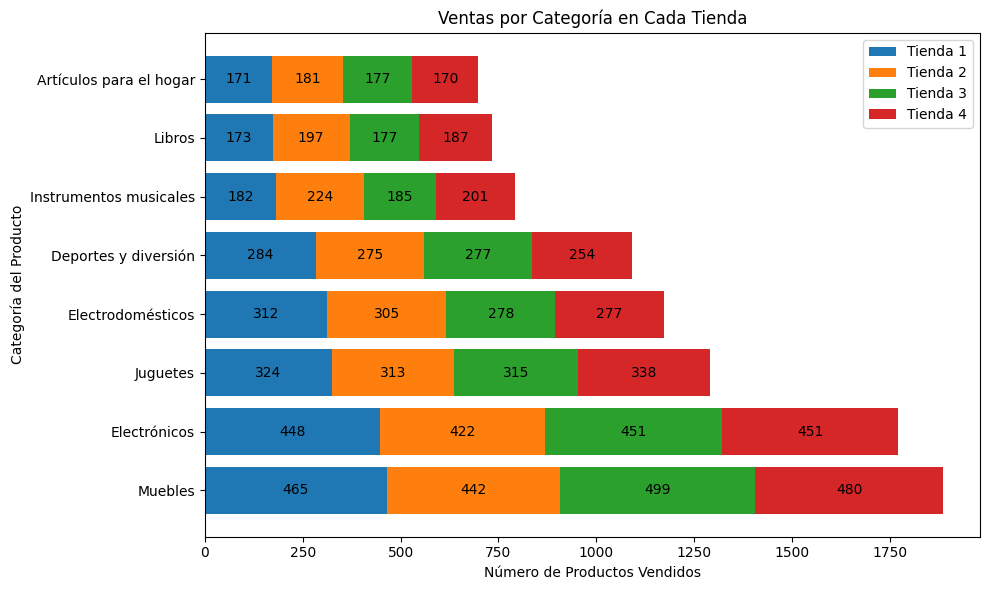

In [14]:

categorias = ventas_por_categoria_tienda1.index.tolist()
tienda1_ventas = ventas_por_categoria_tienda1.values.tolist()
tienda2_ventas = ventas_por_categoria_tienda2.values.tolist()
tienda3_ventas = ventas_por_categoria_tienda3.values.tolist()
tienda4_ventas = ventas_por_categoria_tienda4.values.tolist()


# Ajustar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras apiladas horizontal
width = 0.8  # Ancho de las barras
bottom = [0] * len(categorias) #inicializacion de la barra inferior

plt.barh(categorias, tienda1_ventas, height=width, label='Tienda 1')

for i in range(len(categorias)):
  bottom[i] = tienda1_ventas[i]
  plt.text(tienda1_ventas[i] / 2, i, str(tienda1_ventas[i]), ha='center', va='center') #agrega labels para cada barra

plt.barh(categorias, tienda2_ventas, left=bottom, height=width, label='Tienda 2')
for i in range(len(categorias)):
  bottom[i] = tienda1_ventas[i] + tienda2_ventas[i]
  plt.text((tienda1_ventas[i] + tienda2_ventas[i] / 2), i, str(tienda2_ventas[i]), ha='center', va='center')

plt.barh(categorias, tienda3_ventas, left=bottom, height=width, label='Tienda 3')
for i in range(len(categorias)):
  bottom[i] = tienda1_ventas[i] + tienda2_ventas[i] + tienda3_ventas[i]
  plt.text((tienda1_ventas[i] + tienda2_ventas[i] + tienda3_ventas[i] / 2), i, str(tienda3_ventas[i]), ha='center', va='center')

plt.barh(categorias, tienda4_ventas, left=bottom, height=width, label='Tienda 4')
for i in range(len(categorias)):
  plt.text((tienda1_ventas[i] + tienda2_ventas[i] + tienda3_ventas[i] + tienda4_ventas[i] / 2), i, str(tienda4_ventas[i]), ha='center', va='center')



# Agregar etiquetas y título
plt.xlabel('Número de Productos Vendidos')
plt.ylabel('Categoría del Producto')
plt.title('Ventas por Categoría en Cada Tienda')
plt.legend()

# Mostrar el gráfico
plt.tight_layout()  # Ajusta el diseño para evitar superposiciones
plt.show()

# 3. Calificación promedio de la tienda


Calificación promedio tienda 1: 3.976685036032217
Calificación promedio tienda 2: 4.037303942348453
Calificación promedio tienda 3: 4.048325561678677
Calificación promedio tienda 4: 3.9957591178965224


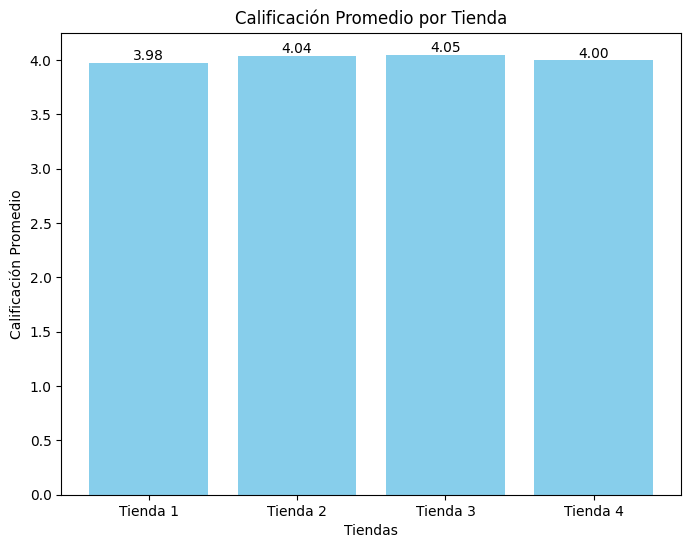

In [16]:


# Calcular la calificación promedio de cada tienda
promedio_calificacion_tienda1 = tienda1['Calificación'].mean()
promedio_calificacion_tienda2 = tienda2['Calificación'].mean()
promedio_calificacion_tienda3 = tienda3['Calificación'].mean()
promedio_calificacion_tienda4 = tienda4['Calificación'].mean()

print(f"Calificación promedio tienda 1: {promedio_calificacion_tienda1}")
print(f"Calificación promedio tienda 2: {promedio_calificacion_tienda2}")
print(f"Calificación promedio tienda 3: {promedio_calificacion_tienda3}")
print(f"Calificación promedio tienda 4: {promedio_calificacion_tienda4}")


# Datos de calificación promedio de cada tienda (reemplaza con tus valores)
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
calificaciones = [promedio_calificacion_tienda1, promedio_calificacion_tienda2, promedio_calificacion_tienda3, promedio_calificacion_tienda4]

# Crear la gráfica de barras
plt.figure(figsize=(8, 6))  # Ajusta el tamaño de la figura si es necesario
plt.bar(tiendas, calificaciones, color='skyblue')
plt.xlabel('Tiendas')
plt.ylabel('Calificación Promedio')
plt.title('Calificación Promedio por Tienda')

# Agregar los valores de calificación encima de cada barra
for i, v in enumerate(calificaciones):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()




# 4. Productos más y menos vendidos

In [17]:
# Función para encontrar los productos más y menos vendidos
def productos_mas_menos_vendidos(df, tienda_num):
    ventas_por_producto = df.groupby('Producto')['Precio'].count().sort_values(ascending=False)
    mas_vendidos = ventas_por_producto.head(5)
    menos_vendidos = ventas_por_producto.tail(5)
    print(f"\nTienda {tienda_num} - Productos más vendidos:")
    print(mas_vendidos)
    print(f"\nTienda {tienda_num} - Productos menos vendidos:")
    print(menos_vendidos)


# Llamar a la función para cada tienda
productos_mas_menos_vendidos(tienda1, 1)
productos_mas_menos_vendidos(tienda2, 2)
productos_mas_menos_vendidos(tienda3, 3)
productos_mas_menos_vendidos(tienda4, 4)


Tienda 1 - Productos más vendidos:
Producto
Armario             60
TV LED UHD 4K       60
Microondas          60
Secadora de ropa    58
Mesa de noche       56
Name: Precio, dtype: int64

Tienda 1 - Productos menos vendidos:
Producto
Mochila                      39
Pandereta                    36
Olla de presión              35
Celular ABXY                 33
Auriculares con micrófono    33
Name: Precio, dtype: int64

Tienda 2 - Productos más vendidos:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Pandereta                    58
Guitarra acústica            58
Name: Precio, dtype: int64

Tienda 2 - Productos menos vendidos:
Producto
Auriculares        37
Sillón             35
Impresora          34
Mesa de comedor    34
Juego de mesa      32
Name: Precio, dtype: int64

Tienda 3 - Productos más vendidos:
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche      55
Name: Pr

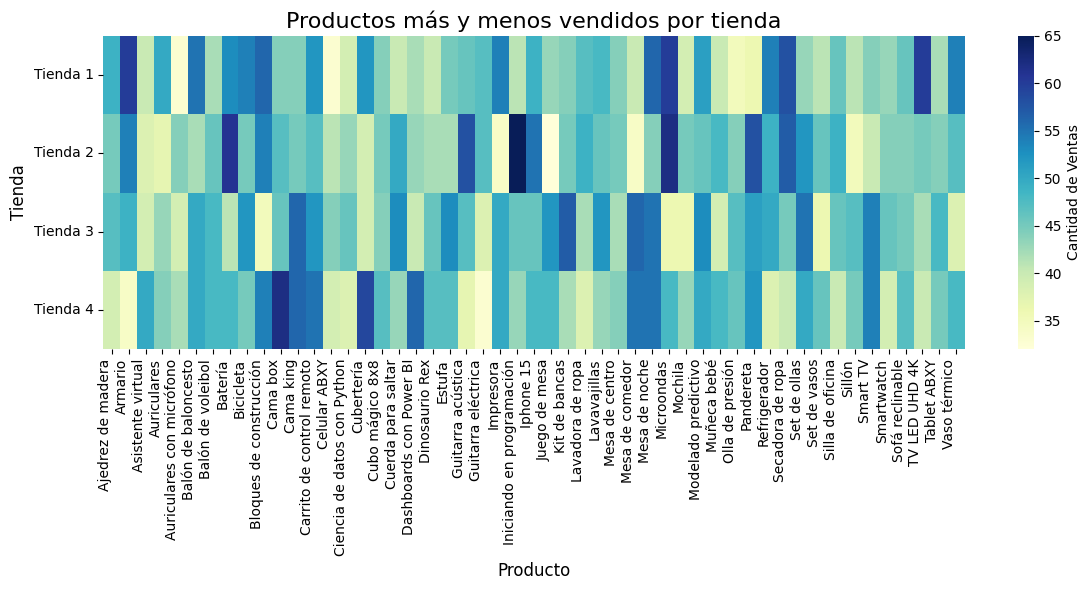

In [18]:
import seaborn as sns
# Función para preparar los datos para el heatmap
def preparar_datos_heatmap(tienda, num_tienda):
    ventas_por_producto = tienda.groupby('Producto')['Precio'].count().sort_values(ascending=False)
    productos = ventas_por_producto.index.tolist()
    ventas = ventas_por_producto.values.tolist()

    datos_heatmap = {'Producto': productos, 'Ventas': ventas}
    df_heatmap = pd.DataFrame(datos_heatmap)
    df_heatmap['Tienda'] = f'Tienda {num_tienda}'
    return df_heatmap

# Preparar los datos para cada tienda
df_heatmap_tienda1 = preparar_datos_heatmap(tienda1, 1)
df_heatmap_tienda2 = preparar_datos_heatmap(tienda2, 2)
df_heatmap_tienda3 = preparar_datos_heatmap(tienda3, 3)
df_heatmap_tienda4 = preparar_datos_heatmap(tienda4, 4)

# Combinar los datos de las cuatro tiendas
df_heatmap_combinado = pd.concat([df_heatmap_tienda1, df_heatmap_tienda2, df_heatmap_tienda3, df_heatmap_tienda4])

# Crear la tabla dinámica para el heatmap
heatmap_data = df_heatmap_combinado.pivot_table(index='Tienda', columns='Producto', values='Ventas', aggfunc='sum')

# Crear el heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=False, cmap='YlGnBu', cbar_kws={'label': 'Cantidad de Ventas'}) #annot=False para ocultar los valores
plt.title('Productos más y menos vendidos por tienda', fontsize=16)
plt.xlabel('Producto', fontsize=12)
plt.ylabel('Tienda', fontsize=12)
plt.xticks(rotation=90, ha='right') # Rotar las etiquetas del eje x para una mejor visualización
plt.yticks(rotation=0)  # Rotar las etiquetas del eje y
plt.tight_layout()
plt.show()


# 5. Envío promedio por tienda

Costo de envío promedio tienda 1: 26018.60958033065
Costo de envío promedio tienda 2: 25216.235693090293
Costo de envío promedio tienda 3: 24805.680373039424
Costo de envío promedio tienda 4: 23459.457167090754


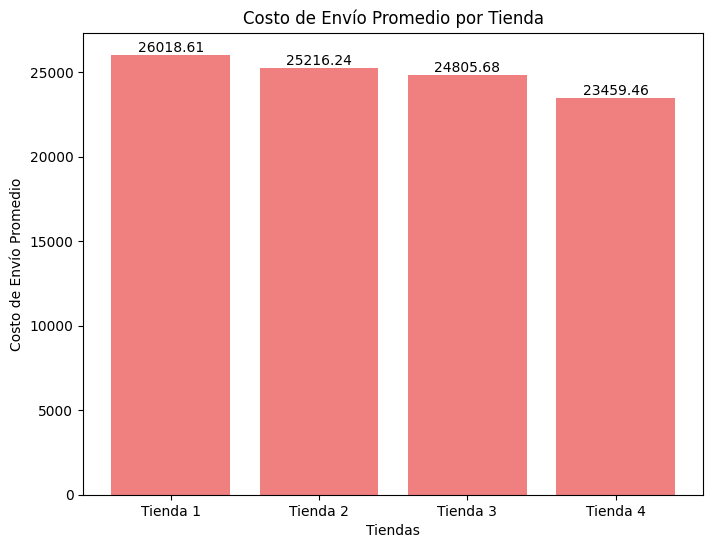

In [19]:
costo_envio_promedio_tienda1 = tienda1['Costo de envío'].mean()
costo_envio_promedio_tienda2 = tienda2['Costo de envío'].mean()
costo_envio_promedio_tienda3 = tienda3['Costo de envío'].mean()
costo_envio_promedio_tienda4 = tienda4['Costo de envío'].mean()

print(f"Costo de envío promedio tienda 1: {costo_envio_promedio_tienda1}")
print(f"Costo de envío promedio tienda 2: {costo_envio_promedio_tienda2}")
print(f"Costo de envío promedio tienda 3: {costo_envio_promedio_tienda3}")
print(f"Costo de envío promedio tienda 4: {costo_envio_promedio_tienda4}")

# Datos de costo de envío promedio de cada tienda
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
costos_envio = [costo_envio_promedio_tienda1, costo_envio_promedio_tienda2, costo_envio_promedio_tienda3, costo_envio_promedio_tienda4]

# Crear la gráfica de barras para el costo de envío promedio
plt.figure(figsize=(8, 6))
plt.bar(tiendas, costos_envio, color='lightcoral')
plt.xlabel('Tiendas')
plt.ylabel('Costo de Envío Promedio')
plt.title('Costo de Envío Promedio por Tienda')

# Agregar los valores de costo de envío encima de cada barra
for i, v in enumerate(costos_envio):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()
